### Resultados

Dois modelos são avaliados nesse código:

ARIMA(p,q,d) não sazonal. Melhor modelo ARIMA(0,1,0)
p=0:Nenhuma ordem auto-regressiva.
d=1: uma diferenciação é neceśsaria pra tornar a serie estacionaria.
q=0;

resumindo: a previsao que o modelo faz pro proximo ano é : valor desse ano + constante; 
modelo simples com serie de tendencia.


Depois da primeira execução da serie, o SARIMA é executado na serie diferenciada.
represento pela variavel arima_bra e a serie foi diferenciada manualmente (bra_ts_diff)

Como seasonal=True, aqui buscamos um modelo sazonal para os dados ja DIFERENCIADOS.

resultado:  SARIMAX(0,0,0)(1,0,0)[12]. Vou destrinchar 

o (0,0,0) (i.e. (p,d,q)) significa que a parte NÃO SAZONAL é vazia, pois a diferenciação ja foi aplicada manualmente.

(1,0,0)[12] a parte sazonal com um termo auto-regressivo de ordem P=1 com a periodicidade de 12 (isto é, m=12)

ARIMA(0,1,0): AIC=467.337; SARIMAX(0,0,0)(1,0,0)[12]: AIC=459.271;

Lembrando que, a serie diferenciada é mais estacionária. UMa serie estacionaria é um tipo de serie temporal que as propriedades estatiticas como a media e a varianca nao mudam ao longo do tempo. Ou seja, relativamente constante o comportamento, muda em alguns pontos.

### ERRATA:

Usei dados MENSAIS. m=12 significa uma sazonalidade mensal em dados anuais (a tabela tem dados anuais) e provavelmente o modelo está identificando um padrão hipotético. Pra dados anuais o ideial é não ter sazonalidade. Ou ter um ciclo de longo prazo, ex: a cada x anos, onde x > 2 (m=x).

Isso foi corrigido.


### Nova avaliação
MAE, RMSE, MASE, FB, AIC - Métricas. quanto menor, melhor.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 
df = pd.read_csv("results.csv")
df.head(22)

,Métrica,Modelo 1 (AutoARIMA na série original),Modelo 2 (AutoARIMA na série diferenciada)
0,Modelo (dados completos),"ARIMA(0,1,0) com intercepto","ARIMA(2,0,0) com intercepto"
1,AIC (dados completos),467.337,468.415
2,Modelo (dados de treino),"ARIMA(0,1,0)","ARMA(0,0)"
3,MAE (Erro Absoluto Médio),769.174,769.174
4,RMSE (Raiz Erro Quadrático Médio),912.991,912.991
5,ME (Viés Médio),+67.4602,+67.4602


PS: O 'com intercepto' significa que tem uma constante c na esquação. Ou seja a constante é somada a cada passo no tempo. O c é um aumento medio de um ano pro outro. "o proximo ano sera igual a este mais o aumento medio historico (c)"

O Modelo 1 teve um AIC menor (467.337 x 468.415) na análise com os dados completos. Ele tem um ajuste um pouco melhor. O Modelo 1 é mais direto enquanto o Modelo 2 exige mais coisas: voce diferencie, modele e depois inverta a previsão. Logo, o Modelo 1 (ARIMA(0,1,0)) é o melhor, porque ele é mais simples e seu AIC foi maior.

Essa função anterior foi feita pra calcular para DIVERSOS HORIZONTES. Nesse seu caos é só um horizonte (my bad). Essa serie de efeito estufa tem um erro sobre um horizonte FIXO de 10 anos (2013-2022).

Gráfico salvo como: Modelo 1 (AutoARIMA na série original)_profile.png


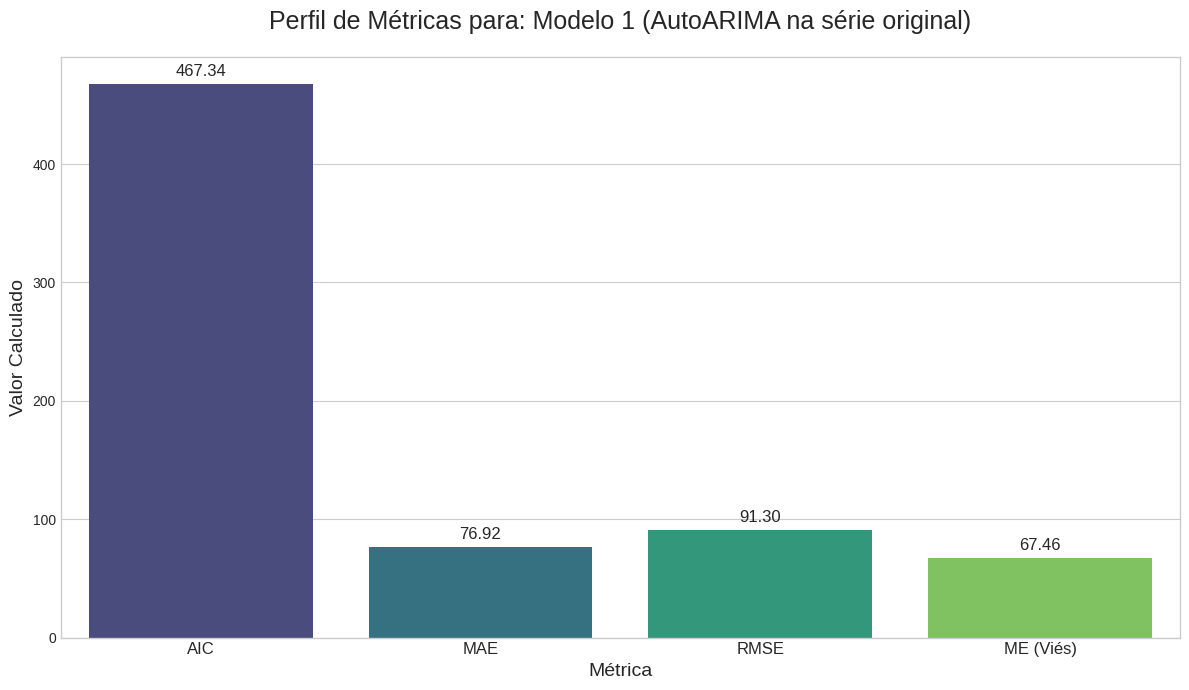

Gráfico salvo como: Modelo 2 (AutoARIMA na série diferenciada)_profile.png


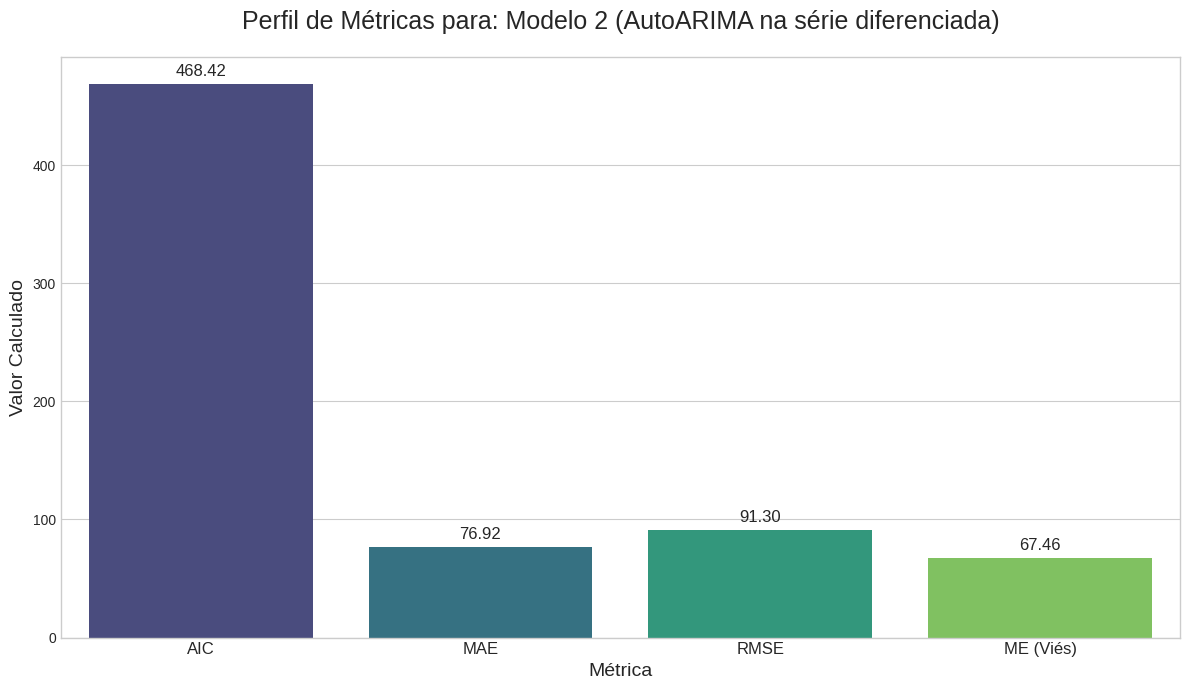

In [3]:
import re
def sanitize_filename(filename):
    return re.sub(r'[\\/*?:"<>|]', "", filename)

def group_plot_adaptada(df_completo: pd.DataFrame, model_name: str):
    metrics = ['AIC', 'MAE', 'RMSE', 'ME (Viés)']
    model_data = df_completo[df_completo['Modelo'] == model_name]
    
    if model_data.empty:
        print(f"Erro: Modelo '{model_name}' não encontrado no DataFrame.")
        return

    df_plot = model_data.melt(id_vars=['Modelo'], 
                              value_vars=metrics, 
                              var_name='Metrica', 
                              value_name='Valor')

    model_name_clean = sanitize_filename(model_name)

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 7))
    
    ax = sns.barplot(x='Metrica', y='Valor', data=df_plot, palette='viridis')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize=12)

    plt.title(f'Perfil de Métricas para: {model_name}', fontsize=18, pad=20)
    plt.xlabel('Métrica', fontsize=14)
    plt.ylabel('Valor Calculado', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=12)
    plt.tight_layout()
    
    output_filename = f"{model_name_clean}_profile.png"
    plt.savefig(output_filename)
    print(f"Gráfico salvo como: {output_filename}")
    plt.show()
    plt.close()

data = {
    'Modelo': [
        'Modelo 1 (AutoARIMA na série original)',
        'Modelo 2 (AutoARIMA na série diferenciada)'
    ],
    'AIC': [467.337, 468.415],
    'MAE': [76.9174, 76.9174],
    'RMSE': [91.2991, 91.2991],
    'ME (Viés)': [67.4602, 67.4602]
}
df_results = pd.DataFrame(data)

group_plot_adaptada(df_completo=df_results, model_name='Modelo 1 (AutoARIMA na série original)')
group_plot_adaptada(df_completo=df_results, model_name='Modelo 2 (AutoARIMA na série diferenciada)')